<a href="https://colab.research.google.com/github/Kaiziferr/ensemble_learning/blob/main/boosting/Ada_Boost/01_Ada_Boost_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.datasets import (
    make_classification
)

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

#**Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr

# **Tools**
---

In [33]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)


def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)

# **Config**
---

In [34]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
paleta = sns.color_palette('Set2').as_hex()
random_seed=73
warnings.filterwarnings('ignore')

# **Data**
---

- The purpose of this exercise is to implement AdaBoost using GridSearchCV
- El propósito de este ejercicio es implementar AdaBoost utilizando GridSearchCV.

A synthetic dataset is generated for a classification problem.

- Number of examples (n_samples)
- Number of predictors (n_features)
- Redundant predictors (n_redundant)
- Number of classes (n_classes)
- Number of centroids per class (n_clusters_per_class)
- Misclassified records (flip_y)
- Distribution of record numbers (weights)

°°°°

Se genera un conjunto de datos sintéticos para un problema de clasificación.

- Número de ejemplos (n_muestras)
- Número de predictores (n_características)
- Predictores redundantes (n_redundantes)
- Número de clases (n_clases)
- Número de centroides por clase (n_grupos_por_clase)
- Registros mal clasificados (flip_y)
- Distribución de números de registros (pesos)

In [35]:
X, y = make_classification(
    n_samples=1500,
    n_features=7,
    n_redundant=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y = 0.05,
    weights = [0.55, 0.45],
    random_state=random_seed)
y = y.reshape((y.shape[0], 1))

I convert the data into a DataFrame format.

°°°°

Convierto los datos a un formato DataFrame.

In [36]:
dta = pd.DataFrame(np.concatenate((X, y), axis=1), columns = [
    'c0',
    'c1',
    'c2',
    'c3',
    'c4',
    'c5',
    'c6',
    'y'])

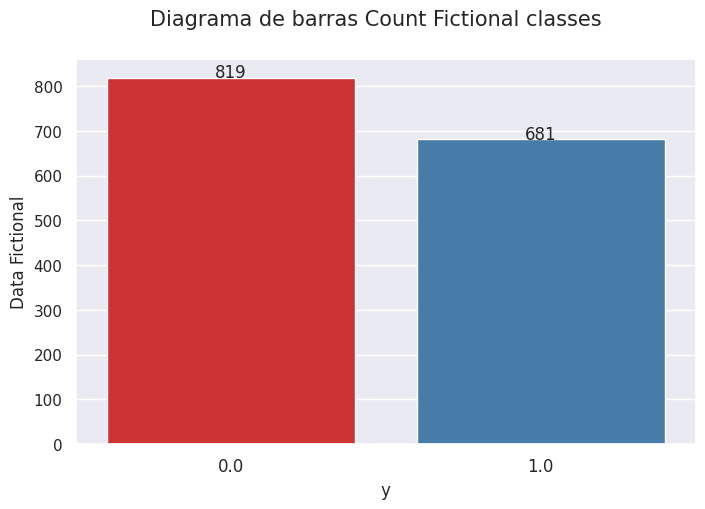

In [37]:
plot_bar(
    dta,
    paleta=None,
    ejeX='y',
    ejey='Data Fictional',
    title='Count Fictional classes')

There is not a very significant imbalance between the classes.

°°°°

No hay un desequilibrio muy significativo entre las clases.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.85,
    stratify=y,
    random_state=random_seed)

I implement AdaBoost using only decision trees (stumps) with low depth.

°°°°

Implemento AdaBoost utilizando únicamente árboles de decisión (stumps) con baja profundidad.

In [39]:
model_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=random_seed)
model_tree2 = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=random_seed)
model_tree3 = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=random_seed)

A dictionary is created with a grid of the following parameters:

- estimator: Models, in this case, the stumps
- n_estimators: Number of estimators
- learning_rate: Learning rate

°°°°

Se crea un diccionario con una cuadrícula de los siguientes parámetros:

- estimador: modelos, en este caso, los tocones
- n_estimadores: número de estimadores
- tasa_de_aprendizaje: tasa de aprendizaje

In [40]:
dict_params = {
    "estimator":      [model_tree, model_tree2, model_tree3],
    "n_estimators":   np.linspace(100, 1000, 3).astype(int),
    "learning_rate":  np.linspace(0.01, 0.1, 10)
}

The AdaBoost model is implemented.

°°°°

Se implementa el modelo AdaBoost.

In [41]:
estimator_ada =  AdaBoostClassifier(
    random_state=random_seed,
    algorithm = "SAMME"
    )

The GridSearchCV is implemented with 'recall' scoring metric

°°°°

GridSearchCV se implementa con la métrica de puntuación de "recuperación"

In [42]:
grid  = GridSearchCV(
    estimator           = estimator_ada,
    cv                  = 5,
    param_grid          = dict_params,
    scoring             = "recall",
    refit               = True,
    verbose             = 0,
    return_train_score  = True
)

In [43]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=73),
             param_grid={'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=4,
                                                              random_state=73),
                                       DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=6,
                                                              random_state=73),
                                       DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=8,
                                                              random_state=73)],
                         'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'n_estimators': array([ 100,  550, 1000])},
             return_train_score=True, scoring='recall')

The best hyperparameter configuration for the model is

°°°°

La mejor configuración de hiperparámetros para el modelo es

In [44]:
grid.best_params_

{'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=73),
 'learning_rate': 0.08,
 'n_estimators': 550}

With a score of

°°°°

Con una puntuación de

In [45]:
grid.best_score_

0.9447376311844078

The best model from those evaluated is selected.

°°°°

Se selecciona el mejor modelo entre los evaluados.

In [46]:
best_model_ada = grid.best_estimator_
best_model_ada.estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=73)

In [47]:
dt_weith_error = pd.DataFrame()
dt_weith_error['Estimators'] = best_model_ada.estimators_
dt_weith_error['Weights'] = best_model_ada.estimator_weights_
dt_weith_error['Normalized_Weights'] = (dt_weith_error['Weights'] /
                                        dt_weith_error['Weights'].sum())
dt_weith_error['Clasification_Error'] = best_model_ada.estimator_errors_
dt_weith_error['Normalized_Error'] = (dt_weith_error['Clasification_Error'] /
                                      dt_weith_error['Clasification_Error'].sum())
dt_weith_error = dt_weith_error.reset_index()
dt_weith_error

,index,Estimators,Weights,Normalized_Weights,Clasification_Error,Normalized_Error
0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0.33,0.01,0.02,0.00
1,1,"DecisionTreeClassifier(criterion='entropy', ma...",0.34,0.01,0.01,0.00
2,2,"DecisionTreeClassifier(criterion='entropy', ma...",0.30,0.01,0.02,0.00
3,3,"DecisionTreeClassifier(criterion='entropy', ma...",0.28,0.01,0.03,0.00
4,4,"DecisionTreeClassifier(criterion='entropy', ma...",0.32,0.01,0.02,0.00
...,...,...,...,...,...,...
545,545,"DecisionTreeClassifier(criterion='entropy', ma...",0.12,0.00,0.19,0.00
546,546,"DecisionTreeClassifier(criterion='entropy', ma...",0.03,0.00,0.41,0.00
547,547,"DecisionTreeClassifier(criterion='entropy', ma...",0.05,0.00,0.34,0.00
548,548,"DecisionTreeClassifier(criterion='entropy', ma...",0.08,0.00,0.27,0.00


The stumps had errors in the initial iterations; as more stumps appeared, the model improved


°°°°

Los tocones tenían errores en las iteraciones iniciales; a medida que aparecían más tocones, el modelo mejora.

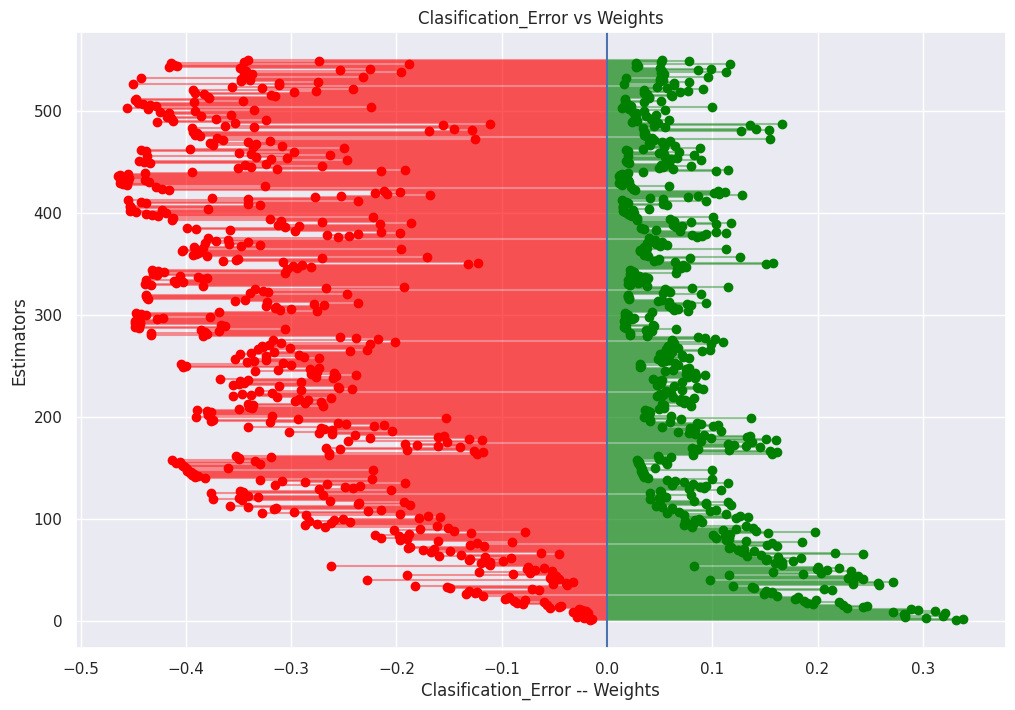

In [48]:
my_range=range(1,len(dt_weith_error.index)+1)
plt.figure(figsize=(12, 8))
plt.hlines(y=my_range, xmin=0, xmax=dt_weith_error['Weights'], color='green', alpha=0.4, zorder=1)
plt.hlines(y=my_range, xmin=dt_weith_error['Clasification_Error']*-1, xmax=0, color='red', alpha=0.4, zorder=1)
plt.scatter(dt_weith_error['Weights'], my_range, color='green', alpha=1, label='value1')
plt.scatter(dt_weith_error['Clasification_Error']*-1, my_range, color='red', alpha=1 , label='value2')
plt.axvline(0);
plt.title("Clasification_Error vs Weights", loc='center')
plt.xlabel('Clasification_Error -- Weights')
plt.ylabel('Estimators')
plt.show()

As seen in the graph, the stumps near the zero axis have a higher weight in the prediction, with a low error rate. While it may seem proportional, it is not; the weight plus the error will not equal one. The mentioned stumps show a significant improvement compared to the majority that were instantiated in the initial iterations.

°°°°

Como se ve en el gráfico, los tocones cercanos al eje cero tienen un mayor peso en la predicción, con una tasa de error baja. Si bien puede parecer proporcional, no lo es; el peso más el error no será igual a uno. Los tocones mencionados muestran una mejora significativa en comparación con la mayoría que se instanciaron en las iteraciones iniciales.

The selected model has a considerable performance with the training data and even better with the validation data

°°°°

El modelo seleccionado tiene un rendimiento considerable con los datos de entrenamiento y aún mejor con los datos de validación.

In [53]:
y_predict = best_model_ada.predict(X_train)
recall_score(y_train, y_predict)

1.0

In [56]:
y_predict = best_model_ada.predict(X_test)
recall_score(y_test, y_predict)

0.9705882352941176

#**Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr